## Project 02: Income Qualification

Submitted By Mr. Vivek Gautam in October 2020

DESCRIPTION

Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:
    
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of
the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.
In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that
considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and
predict their level of need.
While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.
The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household
characteristics, might help improve PMT’s performance.
Following actions should be performed:
1. Identify the output variable.
2. Understand the type of data.
3. Check if there are any biases in your dataset.
4. Check whether all members of the house have the same poverty level.
5. Check if there is a house without a family head.
6. Set poverty level of the members and the head of the house within a family.
7. Count how many null values are existing in columns.
8. Remove null value rows of the target variable.
9. Predict the accuracy using random forest classifier.
10. Check the accuracy using random forest with cross validation. Find the datasets here.


In [1]:
import numpy as np
import pandas as pd 
from pandasql import sqldf

In [2]:
#pip install pandasql

In [3]:
#pip install sqlalchemy
#pip install pandasql

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load the data
trainDf = pd.read_csv(r'D:\Data_Science_Data\Income_Qualification\train.csv')

In [5]:
trainDf

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [6]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [9]:
trainDf.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


## 2. Understand the type of data.


In [7]:
trainDf.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [8]:
trainDf.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

## 1. Identify the output variable

In [9]:
trainDf.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [10]:
trainDf.Target.value_counts() / trainDf.shape[0]*100

4    62.739353
2    16.710265
3    12.650413
1     7.899969
Name: Target, dtype: float64

## 7. Count how many null values are existing in columns

In [11]:
# Total missing values in the DataFrame

sqldf('SELECT COUNT(*) FROM trainDf;')

,COUNT(*)
0,9557


In [15]:
#sqldf('SELECT Target, COUNT(*) FROM trainDf GROUP BY Target;')

In [13]:
# Missing Values
trainDf.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [14]:
trainDf_NaN = pd.DataFrame(data = trainDf.isnull().sum(), columns = ['CountOfNaN'])
print(trainDf_NaN)

                 CountOfNaN
Id                        0
v2a1                   6860
hacdor                    0
rooms                     0
hacapo                    0
...                     ...
SQBovercrowding           0
SQBdependency             0
SQBmeaned                 5
agesq                     0
Target                    0

[143 rows x 1 columns]


In [15]:
trainDf_NaN[trainDf_NaN['CountOfNaN'] != 0]

,CountOfNaN
v2a1,6860
v18q1,7342
rez_esc,7928
meaneduc,5
SQBmeaned,5


#### There are five columns which have missing values

## 3. Check if there are any biases in your dataset.

In [16]:
trainDf_NaN['% NaN'] = (trainDf_NaN['CountOfNaN'] / trainDf.shape[0]) * 100
trainDf_NaN[trainDf_NaN.sum(axis = 1) > 0]

,CountOfNaN,% NaN
v2a1,6860,71.779847
v18q1,7342,76.823271
rez_esc,7928,82.954902
meaneduc,5,0.052318
SQBmeaned,5,0.052318


In [17]:
Missing_cols = trainDf.columns[trainDf.isnull().any()]
Missing_cols

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype='object')

In [18]:
print('#of Missing Columns: {}'.format(len(Missing_cols)))

#of Missing Columns: 5


In [22]:
#pip install missingno

In [19]:
import missingno as msno

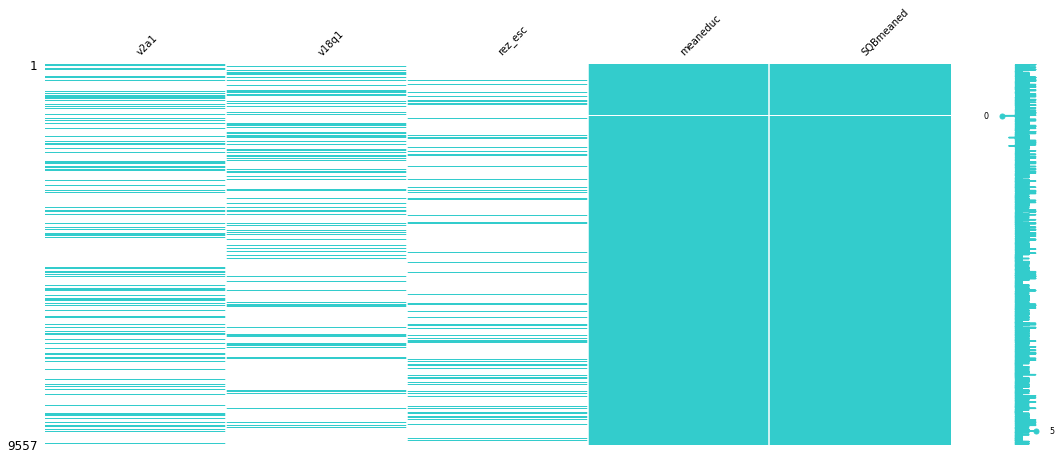

In [20]:
#Showing columns with missing values
msno.matrix(trainDf[Missing_cols], figsize = (18,7), fontsize = 10, color=(0.2,0.8,0.8))

### Remove columns with missing values

In [21]:
trainDf.drop(Missing_cols, axis = 1, inplace = True)

In [22]:
trainDf.shape

(9557, 138)

In [23]:
trainDf_dtypes = trainDf.dtypes.reset_index()
trainDf_dtypes.columns = ["col_names", "col_type"]
print(trainDf_dtypes)

           col_names col_type
0                 Id   object
1             hacdor    int64
2              rooms    int64
3             hacapo    int64
4               v14a    int64
..               ...      ...
133     SQBhogar_nin    int64
134  SQBovercrowding  float64
135    SQBdependency  float64
136            agesq    int64
137           Target    int64

[138 rows x 2 columns]


In [24]:
trainDf_dtypes.groupby("col_type").size()

col_type
int64      130
float64      3
object       5
dtype: int64

In [27]:
trainDf.select_dtypes(include = ['object']).columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [28]:
obj_cols = trainDf.select_dtypes(include = ['object']).columns

In [29]:
obj_df = trainDf[obj_cols]

In [30]:
obj_df.shape

(9557, 5)

In [31]:
#df_obj.head()

trainDf[obj_cols]

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


In [32]:
for col in obj_cols:
    print('Unique value in columns: {} = {}'.format(col, len(trainDf[col].unique())))

Unique value in columns: Id = 9557
Unique value in columns: idhogar = 2988
Unique value in columns: dependency = 31
Unique value in columns: edjefe = 22
Unique value in columns: edjefa = 22


In [35]:
#pip install pandas_profiling
#import pandas_profiling as pp

In [33]:
num_cols = trainDf.select_dtypes(exclude=['object']).columns
num_cols

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
      dtype='object', length=133)

In [34]:
num_df = trainDf[num_cols]

In [35]:
num_df.shape

(9557, 133)

In [36]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hacdor,9557.0,0.038087,0.191417,0.00,0.000000,0.000000,0.000000,1.0
rooms,9557.0,4.955530,1.468381,1.00,4.000000,5.000000,6.000000,11.0
hacapo,9557.0,0.023648,0.151957,0.00,0.000000,0.000000,0.000000,1.0
v14a,9557.0,0.994768,0.072145,0.00,1.000000,1.000000,1.000000,1.0
refrig,9557.0,0.957623,0.201459,0.00,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...
SQBhogar_nin,9557.0,3.844826,6.946296,0.00,0.000000,1.000000,4.000000,81.0
SQBovercrowding,9557.0,3.249485,4.129547,0.04,1.000000,2.250000,4.000000,36.0
SQBdependency,9557.0,3.900409,12.511831,0.00,0.111111,0.444444,1.777778,64.0
agesq,9557.0,1643.774302,1741.197050,0.00,289.000000,961.000000,2601.000000,9409.0


In [37]:
float_cols = trainDf.select_dtypes(include=['float64']).columns

In [38]:
trainDf[float_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
overcrowding,9557.0,1.605380,0.819946,0.20,1.000000,1.500000,2.000000,6.0
SQBovercrowding,9557.0,3.249485,4.129547,0.04,1.000000,2.250000,4.000000,36.0
SQBdependency,9557.0,3.900409,12.511831,0.00,0.111111,0.444444,1.777778,64.0


In [39]:
float_df = trainDf[float_cols]
float_df

,overcrowding,SQBovercrowding,SQBdependency
0,1.000000,1.000000,0.0000
1,1.000000,1.000000,64.0000
2,0.500000,0.250000,64.0000
3,1.333333,1.777778,1.0000
4,1.333333,1.777778,1.0000
...,...,...,...
9552,1.250000,1.562500,0.0625
9553,1.250000,1.562500,0.0625
9554,1.250000,1.562500,0.0625
9555,1.250000,1.562500,0.0625


In [40]:
Q1 = float_df.quantile(0.25)
Q3 = float_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

overcrowding       1.000000
SQBovercrowding    3.000000
SQBdependency      1.666667
dtype: float64


In [41]:
init = False

for col_name in list(float_df.columns):
        
    low = Q1[col_name] - 1.5 *IQR[col_name]
    high = Q3[col_name] + 1.5 *IQR[col_name]
    
    query_string = '{} <@low or {} > @high'.format(col_name, col_name)
    
    outlier_arr_loop = float_df.query(query_string).index
    
    if not init:
        outlier_arr = outlier_arr_loop
        init = True
    outlier_arr = outlier_arr.union(outlier_arr_loop)

In [42]:
len(outlier_arr)

1527

In [43]:
float_df.skew(axis=0)

overcrowding       1.889641
SQBovercrowding    4.186951
SQBdependency      4.404052
dtype: float64

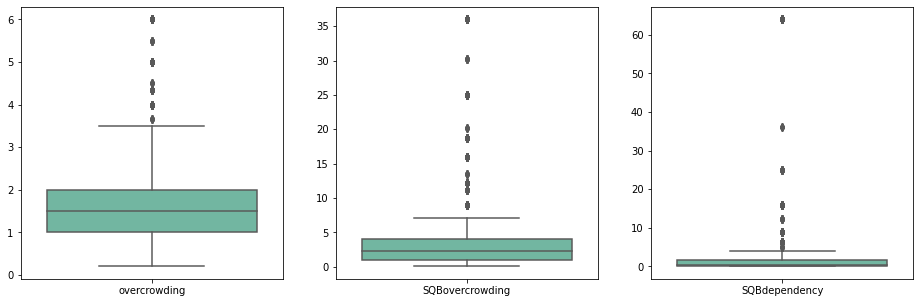

In [44]:
fig, (axes) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
sns.boxplot(data=float_df[['overcrowding']], palette='Set2', ax=axes[0]);
sns.boxplot(data=float_df[['SQBovercrowding']] , palette='Set2', ax=axes[1]);
sns.boxplot(data=float_df[['SQBdependency']], palette='Set2', ax=axes[2]);

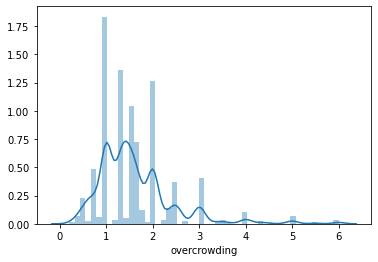

In [46]:
#overcrowding Distribution
sns.distplot(float_df.overcrowding)

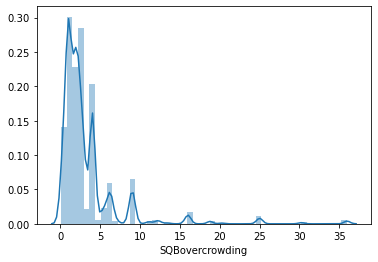

In [47]:
#SQBovercrowding Distribution
sns.distplot(float_df.SQBovercrowding)

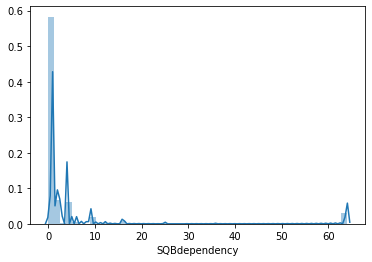

In [48]:
#SQBdependency Distribution
sns.distplot(float_df.SQBdependency)

### 4. Check whether all members of the house have the same poverty level

In [58]:
trainDf.shape

(9557, 138)

In [59]:
#sqldf('SELECT COUNT(DISTINCT idhogar) FROM trainDf')

len(trainDf['idhogar'].unique())

2988

In [49]:
sqldf('SELECT idhogar, Target FROM trainDf order by idhogar;')

,idhogar,Target
0,001ff74ca,4
1,001ff74ca,4
2,003123ec2,2
3,003123ec2,2
4,003123ec2,2
...,...,...
9552,ffe90d46f,1
9553,fff7d6be1,4
9554,fff7d6be1,4
9555,fff7d6be1,4


In [50]:
sqldf('SELECT idhogar, Target FROM trainDf order by idhogar;')

,idhogar,Target
0,001ff74ca,4
1,001ff74ca,4
2,003123ec2,2
3,003123ec2,2
4,003123ec2,2
...,...,...
9552,ffe90d46f,1
9553,fff7d6be1,4
9554,fff7d6be1,4
9555,fff7d6be1,4


In [51]:
trainDf.groupby(['idhogar','Target']).size().unstack()

Target,1,2,3,4
idhogar,,,,
001ff74ca,NaN,NaN,NaN,2.0
003123ec2,NaN,4.0,NaN,NaN
004616164,NaN,2.0,NaN,NaN
004983866,NaN,NaN,2.0,NaN
005905417,NaN,3.0,NaN,NaN
...,...,...,...,...
ff9343a35,NaN,NaN,NaN,4.0
ff9d5ab17,NaN,NaN,NaN,3.0
ffae4a097,NaN,NaN,NaN,2.0


In [54]:
trainDf.groupby(['idhogar','Target']).size().unstack().fillna(0).sample(20)

Target,1,2,3,4
idhogar,,,,
d2e45f8ad,0.0,0.0,1.0,0.0
52e4f45a1,0.0,2.0,0.0,0.0
d3f101545,0.0,0.0,0.0,4.0
9b1454a44,0.0,0.0,0.0,2.0
3852ceb26,0.0,0.0,0.0,4.0
57375845b,0.0,0.0,0.0,2.0
8242a51ec,0.0,1.0,3.0,0.0
19949f9d0,0.0,0.0,0.0,7.0
2934f42ed,0.0,0.0,0.0,4.0


In [55]:
df_family_level = trainDf.groupby(['idhogar','Target']).size().unstack().reset_index()
df_family_level.head(20)

Target,idhogar,1,2,3,4
0,001ff74ca,NaN,NaN,NaN,2.0
1,003123ec2,NaN,4.0,NaN,NaN
2,004616164,NaN,2.0,NaN,NaN
3,004983866,NaN,NaN,2.0,NaN
4,005905417,NaN,3.0,NaN,NaN
5,006031de3,NaN,NaN,NaN,4.0
6,006555fe2,NaN,NaN,NaN,5.0
7,00693f597,NaN,NaN,NaN,4.0
8,006b64543,NaN,NaN,NaN,2.0
9,00941f1f4,4.0,NaN,NaN,NaN


In [56]:
df_family_level.columns

Index(['idhogar', 1, 2, 3, 4], dtype='object', name='Target')

In [57]:
column_names = ['FamilyId', 'Level1', 'Level2', 'Level3', 'Level4']
df_family_level.columns = column_names
df_family_level.head()

,FamilyId,Level1,Level2,Level3,Level4
0,001ff74ca,NaN,NaN,NaN,2.0
1,003123ec2,NaN,4.0,NaN,NaN
2,004616164,NaN,2.0,NaN,NaN
3,004983866,NaN,NaN,2.0,NaN
4,005905417,NaN,3.0,NaN,NaN


In [58]:
df_family_level.fillna(0, inplace = True)

In [59]:
df_family_level['Total_Levels'] = (df_family_level.Level1
                                 + df_family_level.Level2
                                 + df_family_level.Level3
                                 + df_family_level.Level4)

In [60]:
df_family_level.head()

,FamilyId,Level1,Level2,Level3,Level4,Total_Levels
0,001ff74ca,0.0,0.0,0.0,2.0,2.0
1,003123ec2,0.0,4.0,0.0,0.0,4.0
2,004616164,0.0,2.0,0.0,0.0,2.0
3,004983866,0.0,0.0,2.0,0.0,2.0
4,005905417,0.0,3.0,0.0,0.0,3.0


In [61]:
poverty_level=trainDf.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

In [62]:
print('{} Households have different Target value.'.format(sum(poverty_level == False)))

85 Households have different Target value.


## 5. Check if there is a house without a family head.

In [63]:
trainDf.columns

Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
       'r4h2', 'r4h3',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
      dtype='object', length=138)

In [64]:
trainDf.parentesco1

0       1
1       1
2       1
3       0
4       0
       ..
9552    1
9553    0
9554    0
9555    0
9556    0
Name: parentesco1, Length: 9557, dtype: int64

In [65]:
grouped = trainDf.groupby('idhogar')
grouped.apply(lambda x : x[x['parentesco1'] != 1]['parentesco1'])

idhogar        
001ff74ca  7471    0
003123ec2  8159    0
           8161    0
           8162    0
004616164  6473    0
                  ..
ffe90d46f  9350    0
           9351    0
fff7d6be1  5948    0
           5949    0
           5951    0
Name: parentesco1, Length: 6584, dtype: int64

In [66]:
trainDf.idhogar

0       21eb7fcc1
1       0e5d7a658
2       2c7317ea8
3       2b58d945f
4       2b58d945f
          ...    
9552    d6c086aa3
9553    d6c086aa3
9554    d6c086aa3
9555    d6c086aa3
9556    d6c086aa3
Name: idhogar, Length: 9557, dtype: object

In [67]:
sqldf('SELECT idhogar, parentesco1 FROM trainDf order by idhogar;')

,idhogar,parentesco1
0,001ff74ca,0
1,001ff74ca,1
2,003123ec2,0
3,003123ec2,1
4,003123ec2,0
...,...,...
9552,ffe90d46f,0
9553,fff7d6be1,0
9554,fff7d6be1,0
9555,fff7d6be1,1


In [68]:
sqldf('SELECT idhogar, COUNT(parentesco1) FROM trainDf GROUP BY idhogar HAVING COUNT(parentesco1) = 0;')

,idhogar,COUNT(parentesco1)


### 6. Set poverty level of the members and the head of the house within a family

In [69]:
#pl = sqldf('SELECT idhogar, Target FROM trainDf ORDER BY idhogar;')

pl = trainDf[['idhogar', 'Target']].sort_values(by='idhogar', ascending=True)
pl

,idhogar,Target
7472,001ff74ca,4
7471,001ff74ca,4
8159,003123ec2,2
8160,003123ec2,2
8161,003123ec2,2
...,...,...
9351,ffe90d46f,1
5948,fff7d6be1,4
5949,fff7d6be1,4
5950,fff7d6be1,4


In [70]:
pl.shape

(9557, 2)

In [71]:
#a=pl.idhogar[0]
#for i in range(len(pl)) :

count = 0;

print('Family Id \t Poverty Level')

for i in range(5000):
    
    f1 = pl.idhogar[i]
    f2 = pl.idhogar[i+1]
    
    if (f1 == f2):
        t1=pl.Target[i]
        t2=pl.Target[i+1]
        
        if(t1 != t2):
        
            count = count + 1;
            pl.Target[i+1] = pl.Target[i]
            print(pl.idhogar[i],'\t', pl.Target[i+1])
print(count)

Family Id 	 Poverty Level
4b6077882 	 1
4b6077882 	 1
6833ac5dc 	 2
43b9c83e5 	 2
5c3f7725d 	 3
5c3f7725d 	 3
0f9494d3a 	 2
0f9494d3a 	 2
0f9494d3a 	 2
daafc1281 	 2
daafc1281 	 2
daafc1281 	 2
73d85d05d 	 2
bcaa2e2f5 	 4
44f219a16 	 3
efd3aec61 	 2
efd3aec61 	 2
3c6973219 	 4
0511912b6 	 4
f006348ed 	 3
f006348ed 	 3
f006348ed 	 3
a20ff33ba 	 2
5e9329fc6 	 3
e65d4b943 	 3
42ec8bef5 	 2
42ec8bef5 	 2
6bcf799cf 	 2
26b3a0f41 	 3
4dc11e11f 	 1
4dc11e11f 	 1
594d3eb27 	 2
594d3eb27 	 2
d9b1558b5 	 1
d9b1558b5 	 1
7ea6aca15 	 4
8bb6da3c1 	 2
8bb6da3c1 	 2
3df651058 	 1
811a35744 	 4
811a35744 	 4
2cb443214 	 2
42


In [72]:
pl

,idhogar,Target
7472,001ff74ca,4
7471,001ff74ca,4
8159,003123ec2,2
8160,003123ec2,2
8161,003123ec2,2
...,...,...
9351,ffe90d46f,1
5948,fff7d6be1,4
5949,fff7d6be1,4
5950,fff7d6be1,4


### Now, poverty level of each member and the head of the house within a family is same.

## 8. Remove null value rows of the target variable.


In [73]:
trainDf['Target'].isnull().sum()

0

### Null values are not present in target variable

## 9. Predict the accuracy using random forest classifier.


In [74]:
obj_df.columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [75]:
obj_df.head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [76]:
obj_df.columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [77]:
obj_df.head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [78]:
# Prepare DataFrame by Convertinjg Object columns into numeric columns using One Hot Encoding
obj_df_OHE = pd.DataFrame(pd.get_dummies(obj_df, columns=["idhogar", "dependency", "edjefe", "edjefa"]))

In [79]:
obj_df_OHE.head()

,Id,idhogar_001ff74ca,idhogar_003123ec2,idhogar_004616164,idhogar_004983866,idhogar_005905417,idhogar_006031de3,idhogar_006555fe2,idhogar_00693f597,idhogar_006b64543,...,edjefa_21,edjefa_3,edjefa_4,edjefa_5,edjefa_6,edjefa_7,edjefa_8,edjefa_9,edjefa_no,edjefa_yes
0,ID_279628684,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,ID_f29eb3ddd,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,ID_68de51c94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_d671db89c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ID_d56d6f5f5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
obj_df_OHE.head().columns

Index(['Id', 'idhogar_001ff74ca', 'idhogar_003123ec2', 'idhogar_004616164',
       'idhogar_004983866', 'idhogar_005905417', 'idhogar_006031de3',
       'idhogar_006555fe2', 'idhogar_00693f597', 'idhogar_006b64543',
       ...
       'edjefa_21', 'edjefa_3', 'edjefa_4', 'edjefa_5', 'edjefa_6', 'edjefa_7',
       'edjefa_8', 'edjefa_9', 'edjefa_no', 'edjefa_yes'],
      dtype='object', length=3064)

In [81]:
# Prepare DataFrame by Convertinjg Object columns into numeric columns using One Hot Encoding
float_df_OHE = pd.DataFrame(pd.get_dummies(float_df.columns, columns=['overcrowding''SQBovercrowding', 'SQBdependency']))

In [82]:
float_df_OHE.head()

,SQBdependency,SQBovercrowding,overcrowding
0,0,0,1
1,0,1,0
2,1,0,0


In [101]:
# Drop object columns from Train DataFrame
#TrainDfDropObj = pd.DataFrame(trainDf.drop(["Id", "idhogar", "dependency", "edjefe", "edjefa"], axis=1))

In [102]:
#TrainDfDrop.Id

In [103]:
#FinalTrainDf = pd.DataFrame(pd.concat([TrainDfDropObj, obj_df_OHE]))
FinalTrainDf = pd.DataFrame(pd.concat([obj_df_OHE, num_df]))

In [104]:
FinalTrainDf.shape

(19114, 3197)

In [105]:
FinalTrainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19114 entries, 0 to 9556
Columns: 3197 entries, Id to Target
dtypes: float64(3196), object(1)
memory usage: 466.4+ MB


In [106]:
FinalTrainDf.select_dtypes(include = ['object']).columns

Index(['Id'], dtype='object')

In [107]:
FinalTrainDf = FinalTrainDf.drop('Id', axis=1)

In [108]:
#FinalTrainDf.Id

In [109]:
FinalTrainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19114 entries, 0 to 9556
Columns: 3196 entries, idhogar_001ff74ca to Target
dtypes: float64(3196)
memory usage: 466.2 MB


In [110]:
# Missing Values
#FinalTrainDf.isnull().sum()
#FinalTrainDf.isna().sum()
FinalTrainDf_NaN = pd.DataFrame(data = FinalTrainDf.isnull().sum(), columns = ['CountOfNaN'])
FinalTrainDf_NaN[FinalTrainDf_NaN['CountOfNaN'] != 0]

,CountOfNaN
idhogar_001ff74ca,9557
idhogar_003123ec2,9557
idhogar_004616164,9557
idhogar_004983866,9557
idhogar_005905417,9557
...,...
SQBhogar_nin,9557
SQBovercrowding,9557
SQBdependency,9557
agesq,9557


In [111]:
FinalTrainDf.fillna(0, inplace = True)
FinalTrainDf.head()

,idhogar_001ff74ca,idhogar_003123ec2,idhogar_004616164,idhogar_004983866,idhogar_005905417,idhogar_006031de3,idhogar_006555fe2,idhogar_00693f597,idhogar_006b64543,idhogar_00941f1f4,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,agesq,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
#FinalTrainDf.isna().sum()
FinalTrainDf_NaN = pd.DataFrame(data = FinalTrainDf.isnull().sum(), columns = ['CountOfNaN'])
FinalTrainDf_NaN[FinalTrainDf_NaN['CountOfNaN'] != 0]

,CountOfNaN


In [113]:
X = FinalTrainDf.drop('Target', axis=1)
y = FinalTrainDf['Target']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3, random_state = 110)
#X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.7, random_state = 11)
print(len(X_train))
print(len(X_test))

13379
5735


In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [117]:
predictions = rfc.predict(X_test)
print("---------- Test Accuracy ----------")
accuracy_test = accuracy_score(y_test, predictions)
print(accuracy_test)
print("\n---------- Confusion Matrix ----------")
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print("\n---------- Classification Report ----------")
print(classification_report(y_test, predictions))

---------- Test Accuracy ----------
0.9150828247602442

---------- Confusion Matrix ----------
[[2853    0    0    0    0]
 [   0  134   19    0   79]
 [   0    4  304    3  170]
 [   0    0   18  156  189]
 [   0    0    4    1 1801]]

---------- Classification Report ----------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2853
         1.0       0.97      0.58      0.72       232
         2.0       0.88      0.63      0.74       481
         3.0       0.97      0.43      0.60       363
         4.0       0.80      1.00      0.89      1806

    accuracy                           0.92      5735
   macro avg       0.93      0.73      0.79      5735
weighted avg       0.93      0.92      0.91      5735



### Here, Accuracy on train data is 92 %

## Apply the Model on Test Data

In [120]:
testDf = pd.read_csv(r'D:\Data_Science_Data\Income_Qualification\test.csv')

In [122]:
testDf.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [123]:
testDf_NaN = pd.DataFrame(data = testDf.isnull().sum(), columns = ['CountOfNaN'])
print(testDf_NaN)

                 CountOfNaN
Id                        0
v2a1                  17403
hacdor                    0
rooms                     0
hacapo                    0
...                     ...
SQBhogar_nin              0
SQBovercrowding           0
SQBdependency             0
SQBmeaned                31
agesq                     0

[142 rows x 1 columns]


In [124]:
testDf_NaN['% NaN'] = (testDf_NaN['CountOfNaN'] / testDf.shape[0]) * 100
testDf_NaN[testDf_NaN.sum(axis = 1) > 0]

,CountOfNaN,% NaN
v2a1,17403,72.950201
v18q1,18126,75.980885
rez_esc,19653,82.381791
meaneduc,31,0.129946
SQBmeaned,31,0.129946


In [125]:
Missing_cols_test = testDf.columns[testDf.isnull().any()]
Missing_cols_test

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype='object')

In [126]:
testDf.drop(Missing_cols, axis = 1, inplace = True)
testDf.shape

(23856, 137)

In [127]:
testDf.select_dtypes(include = ['object']).columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [128]:
obj_cols_test = testDf.select_dtypes(include = ['object']).columns

In [129]:
obj_df_test = testDf[obj_cols_test]

In [130]:
for col in obj_cols_test:
    print('Unique value in columns: {} = {}'.format(col, len(testDf[col].unique())))

Unique value in columns: Id = 23856
Unique value in columns: idhogar = 7352
Unique value in columns: dependency = 35
Unique value in columns: edjefe = 22
Unique value in columns: edjefa = 22


In [131]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [132]:
testDf["idhogar_code"] = lb_make.fit_transform(testDf["idhogar"])
pd.unique(testDf[["idhogar", "idhogar_code"]].values.ravel())

array(['72958b30c', 3230, '5b598fbc9', ..., 1659, 'd237404b6', 5963],
      dtype=object)

In [133]:
testDf["dependency_code"] = lb_make.fit_transform(testDf["dependency"])
pd.unique(testDf[["dependency", "dependency_code"]].values.ravel())

array(['.5', 9, 'no', 33, '8', 32, 'yes', 34, '.25', 4, '2', 21,
       '.33333334', 6, '.375', 7, '.60000002', 10, '1.5', 19, '.2', 3,
       '.75', 12, '.66666669', 11, '3', 25, '.14285715', 1, '.40000001',
       8, '.80000001', 13, '1.6666666', 20, '.2857143', 5, '1.25', 17,
       '2.5', 24, '5', 29, '.85714287', 15, '1.3333334', 18, '.16666667',
       2, '4', 28, '.125', 0, '.83333331', 14, '2.3333333', 23, '7', 31,
       '1.2', 16, '3.5', 27, '2.25', 22, '3.3333333', 26, '6', 30],
      dtype=object)

In [134]:
testDf["edjefe_code"] = lb_make.fit_transform(testDf["edjefe"])
pd.unique(testDf[["edjefe", "edjefe_code"]].values.ravel())

array(['no', 20, '16', 6, '10', 0, '6', 16, '11', 1, '8', 18, '13', 3,
       '14', 4, '5', 15, '3', 13, '9', 19, '17', 7, '15', 5, '7', 17,
       '21', 12, '4', 14, '12', 2, '2', 10, '20', 11, 'yes', 21, '19', 9,
       '18', 8], dtype=object)

In [135]:
testDf["edjefa_code"] = lb_make.fit_transform(testDf["edjefa"])
pd.unique(testDf[["edjefa", "edjefa_code"]].values.ravel())

array(['17', 7, 'no', 20, '11', 1, '14', 4, '10', 0, '15', 5, '9', 19,
       '6', 16, '8', 18, '3', 13, '2', 10, '5', 15, '16', 6, '12', 2,
       'yes', 21, '7', 17, '13', 3, '21', 12, '4', 14, '19', 9, '18', 8,
       '20', 11], dtype=object)

In [136]:
#num_cols_test = testDf.select_dtypes(exclude=['object']).columns
#num_cols_test

In [137]:
#num_df_test = testDf[num_cols_test]

In [138]:
# Prepare DataFrame by Convertinjg Object columns into numeric columns using One Hot Encoding
# obj_df_OHE_test = pd.DataFrame(pd.get_dummies(obj_df_test, columns=["idhogar", "dependency", "edjefe", "edjefa"]))
# obj_df_OHE_test.head()

In [139]:
#num_drof_float_df = pd.DataFrame(num_df_test.drop(['SQBdependency', 'SQBovercrowding','overcrowding'], axis=1))
#TestDfDropObj = pd.DataFrame(testDf.drop(["Id", "idhogar", "dependency", "edjefe", "edjefa"], axis=1))
#TestDfDropObj.head()

In [140]:
#obj_df_OHE_test.select_dtypes(include=['float64']).columns

In [141]:
#FinalTestDf = pd.DataFrame(pd.concat([TestDfDropObj, obj_df_OHE_test]))
#FinalTestDf = pd.DataFrame(pd.concat([TestDfDropObj, num_df_test]))

In [143]:
FinalTestDf.shape

NameError: name 'FinalTestDf' is not defined

In [145]:
FinalTestDf.info()

NameError: name 'FinalTestDf' is not defined

In [146]:
FinalTestDf_NaN = pd.DataFrame(data = FinalTestDf.isnull().sum(), columns = ['CountOfNaN'])
FinalTestDf_NaN[FinalTestDf_NaN['CountOfNaN'] != 0]

NameError: name 'FinalTestDf' is not defined

In [144]:
X = FinalTrainDf

In [147]:
predictions = rfc.predict(X_test)
print("---------- Test Accuracy ----------")
accuracy_test = accuracy_score(y_test, predictions)
print(accuracy_test)
print("\n---------- Confusion Matrix ----------")
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print("\n---------- Classification Report ----------")
print(classification_report(y_test, predictions))

---------- Test Accuracy ----------
0.9150828247602442

---------- Confusion Matrix ----------
[[2853    0    0    0    0]
 [   0  134   19    0   79]
 [   0    4  304    3  170]
 [   0    0   18  156  189]
 [   0    0    4    1 1801]]

---------- Classification Report ----------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2853
         1.0       0.97      0.58      0.72       232
         2.0       0.88      0.63      0.74       481
         3.0       0.97      0.43      0.60       363
         4.0       0.80      1.00      0.89      1806

    accuracy                           0.92      5735
   macro avg       0.93      0.73      0.79      5735
weighted avg       0.93      0.92      0.91      5735



### Here, Accuracy on test data is 92 %

---------------------------------------------------- Thank You ----------------------------------------------------------------